In [1]:
# !pip install --user gtts

In [2]:
#Importing the required libraries
import pandas as pd 
import numpy as np
import random
from playsound import playsound
import re 
import gtts
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#importing the dataset
movies_dataset=pd.read_csv('Dataset/ml-latest-small/movies.csv')
ratings_dataset=pd.read_csv('Dataset/ml-latest-small/ratings.csv')

In [4]:
#Checking the head and info of our dataset
print(movies_dataset.shape)
movies_dataset.head(5)

(9125, 3)


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
print(ratings_dataset.shape)
ratings_dataset.head(5)

(100004, 4)


,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [6]:
movies_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9125 entries, 0 to 9124
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9125 non-null   int64 
 1   title    9125 non-null   object
 2   genres   9125 non-null   object
dtypes: int64(1), object(2)
memory usage: 214.0+ KB


In [7]:
ratings_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100004 entries, 0 to 100003
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100004 non-null  int64  
 1   movieId    100004 non-null  int64  
 2   rating     100004 non-null  float64
 3   timestamp  100004 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


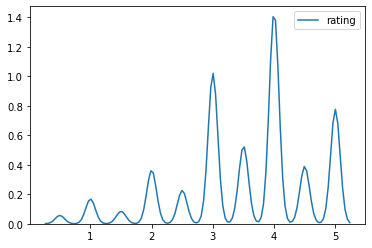

In [8]:
sns.kdeplot(ratings_dataset['rating'])

In [9]:
#Converting the format of Genre column to a list and then appending to the new list
Genre=[]
Genres={}
for num in range(0,len(movies_dataset)):
    key=movies_dataset.iloc[num]['title']
    value=' '.join(movies_dataset.iloc[num]['genres'].split('|'))
    Genres[key]=value
    Genre.append(value)

In [10]:
#Making a new column in our original Dataset         
movies_dataset['New Genres'] =Genre
movies_dataset.head()

,movieId,title,genres,New Genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Adventure Animation Children Comedy Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy,Adventure Children Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance,Comedy Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,Comedy Drama Romance
4,5,Father of the Bride Part II (1995),Comedy,Comedy


In [11]:
# movies_dataset['title'][0].split()[-1][1:-1]

In [12]:
#Getting the year from the movie column 
years=[]
for i in range (len(movies_dataset)):
    year = movies_dataset['title'][i].split()[-1][1:-1]
    years.append(year)  
movies_dataset['year']=years

movies_dataset.tail()

,movieId,title,genres,New Genres,year
9120,162672,Mohenjo Daro (2016),Adventure|Drama|Romance,Adventure Drama Romance,2016
9121,163056,Shin Godzilla (2016),Action|Adventure|Fantasy|Sci-Fi,Action Adventure Fantasy Sci-Fi,2016
9122,163949,The Beatles: Eight Days a Week - The Touring Y...,Documentary,Documentary,2016
9123,164977,The Gay Desperado (1936),Comedy,Comedy,1936
9124,164979,"Women of '69, Unboxed (2014)",Documentary,Documentary,2014


In [13]:
# ' '.join(movies_dataset['title'][0].split()[:-1])

In [14]:
#Deleting the year from the movies title column
movies_name=[]
raw=[]
for i in range(len(movies_dataset)):
    new_name = ' '.join(movies_dataset['title'][i].split()[:-1])
    movies_name.append(new_name)  
movies_dataset['title'] = movies_name
movies_dataset.head()

,movieId,title,genres,New Genres,year
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,Adventure Animation Children Comedy Fantasy,1995
1,2,Jumanji,Adventure|Children|Fantasy,Adventure Children Fantasy,1995
2,3,Grumpier Old Men,Comedy|Romance,Comedy Romance,1995
3,4,Waiting to Exhale,Comedy|Drama|Romance,Comedy Drama Romance,1995
4,5,Father of the Bride Part II,Comedy,Comedy,1995


In [15]:
movies_dataset.drop('genres',axis=1,inplace=True)

In [16]:
movies_dataset.head(2)

,movieId,title,New Genres,year
0,1,Toy Story,Adventure Animation Children Comedy Fantasy,1995
1,2,Jumanji,Adventure Children Fantasy,1995


In [17]:
movies_dataset['title'] = [title.lower() for title in movies_dataset['title']]
movies_dataset['New Genres'] = [genre.lower() for genre in movies_dataset['New Genres']]
movies_dataset.head()

,movieId,title,New Genres,year
0,1,toy story,adventure animation children comedy fantasy,1995
1,2,jumanji,adventure children fantasy,1995
2,3,grumpier old men,comedy romance,1995
3,4,waiting to exhale,comedy drama romance,1995
4,5,father of the bride part ii,comedy,1995


In [18]:
 #Applying Feature extraction 
from sklearn.feature_extraction.text import TfidfVectorizer

In [19]:
tfid=TfidfVectorizer(stop_words='english')
#matrix after applying the tfidf
matrix=tfid.fit_transform(movies_dataset['New Genres'])


In [20]:
#Compute the cosine similarity of every genre
from sklearn.metrics.pairwise import cosine_similarity


In [21]:
cosine_sim=cosine_similarity(matrix,matrix)
cosine_sim.shape

(9125, 9125)

In [22]:
#Making a new series which have two columns in it 
#Movie name and movie id 
movies_dataset = movies_dataset.reset_index()
titles = movies_dataset['title']
indices = pd.Series(movies_dataset.index, index=movies_dataset['title'])

indices.head()

title
toy story                      0
jumanji                        1
grumpier old men               2
waiting to exhale              3
father of the bride part ii    4
dtype: int64

In [23]:
#Function to make recommendation to the user
def recommendataion(movie):
    result=[]
    #Getting the id of the movie for which the user want recommendation
    ind=indices[movie]
    #Getting all the similar cosine score for that movie
    sim_scores=list(enumerate(cosine_sim[ind]))
    #Sorting the list obtained
    sim_scores=sorted(sim_scores,key=lambda x:x[1],reverse=True)    
    #Getting all the id of the movies that are related to the movie Entered by the user
    movie_id=[i[0] for i in sim_scores]    
    print('The Movie You Should Watched Next Are --')
    print('ID ,   Name ,  Average Ratings , Year ')
    #Varible to print only top 5 movies
    count=0
    for id in range(0,len(movie_id)):
      #to ensure that the movie entered by the user is doesnot come in his/her recommendation
        if(ind != movie_id[id]):
            ratings=ratings_dataset[ratings_dataset['movieId']==movie_id[id]]['rating']
            avg_ratings=round(np.mean(ratings),2)
            #To print only thoese movies which have an average ratings that is more than 3.5
            if(avg_ratings >3.5):
                count+=1
                print(f'{movie_id[id]} , {titles[movie_id[id]]} ,{avg_ratings}')
                result.append([titles[movie_id[id]],str(avg_ratings)])
            if(count >=5):
                    break
    
    return result

In [24]:
def dash_table_parser(df):
    df['Recommended Movies'] = [movie.title() for movie in df['Recommended Movies']]
    return html.Div([
        dbc.Table.from_dataframe(df, striped=True, bordered=True, hover=True, dark=False,className='text-field-result')
    ])

In [34]:
import base64
import datetime
import io

import dash
from dash.dependencies import Input, Output, State
import dash_core_components as dcc
import dash_html_components as html
import dash_table
from dash_table.Format import Format, Group, Scheme, Symbol
import dash_bootstrap_components as dbc
import plotly.express as px
from plotly.tools import mpl_to_plotly

image_bg = 'assets//bg.jpg'
encoded_bg = base64.b64encode(open(image_bg, 'rb').read())

# image_logo = 'D://Work Files//Einnel//submission//assets//logo.png' # replace with your own image
# encoded_logo = base64.b64encode(open(image_logo, 'rb').read())

app = dash.Dash(external_stylesheets=[dbc.themes.SLATE])
colors = {'background': '#01151a','text': '#beeefa'}

app.layout = html.Div([
    html.H1('Movie Recommendation System',className='text-field-title'),
    dbc.Input(id="movie-name", placeholder="Enter Name of Movie", type="text",style = dict(width = '20%',display = 'list-item'),className='text-field'),
    dbc.Button("Submit", id='submit',color="success",size="lg",n_clicks=0,className = "home-button"),
    html.Div(id='output'),
    
    html.Div( children=[
    html.Img(className='bg',src='data:image/png;base64,{}'.format(encoded_bg.decode())) ])
    
])
#===================================================================================================#    

@app.callback(Output('output','children'),
            [Input('submit', 'n_clicks')],
            [State('movie-name', 'value')])
#              [State('input-on-submit', 'value')])

def update_datatable(n_clicks,movie): 
    if n_clicks:
        df = pd.DataFrame(recommendataion(movie.lower()),columns=['Recommended Movies','Rating'])
        return [dash_table_parser(df)]
    

if __name__ == '__main__':
    app.run_server(debug=False)


Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off
